In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Reshape

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

batch_size = 100
input_img = Input(shape=(28,28,1))

In [5]:
x = Conv2D(32, (3,3), activation ='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding ='same')(x)
x = Conv2D(64,(3,3), activation='relu', padding='same')(x)
enc = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(enc)
x = UpSampling2D ((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
dec = Conv2D(1,(3,3), activation='linear', padding='same')(x)

In [6]:
autoencoder = keras.Model(input_img, dec, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train, epochs=15, batch_size=batch_size, shuffle=True)

Epoch 1/15
600/600 [==============================] - 47s 77ms/step - loss: 0.0041
Epoch 2/15
600/600 [==============================] - 45s 75ms/step - loss: 0.0036
Epoch 3/15
600/600 [==============================] - 46s 76ms/step - loss: 0.0036
Epoch 4/15
600/600 [==============================] - 46s 77ms/step - loss: 0.0035
Epoch 5/15
600/600 [==============================] - 46s 76ms/step - loss: 0.0035
Epoch 6/15
600/600 [==============================] - 46s 77ms/step - loss: 0.0035
Epoch 7/15
600/600 [==============================] - 46s 77ms/step - loss: 0.0035
Epoch 8/15
600/600 [==============================] - 46s 76ms/step - loss: 0.0035
Epoch 9/15
600/600 [==============================] - 46s 76ms/step - loss: 0.0035
Epoch 10/15
600/600 [==============================] - 46s 76ms/step - loss: 0.0035
Epoch 11/15
600/600 [==============================] - 46s 76ms/step - loss: 0.0035
Epoch 12/15
600/600 [==============================] - 46s 76ms/step - loss: 0.0035
E

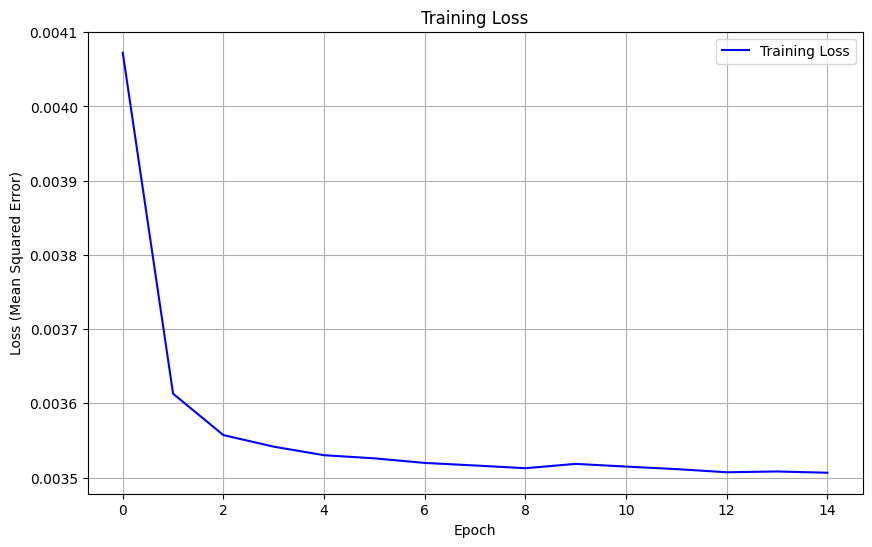

In [9]:
loss_history = autoencoder.history.history['loss']
epochs = range(len(loss_history))

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_history, 'b-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 2s 6ms/step


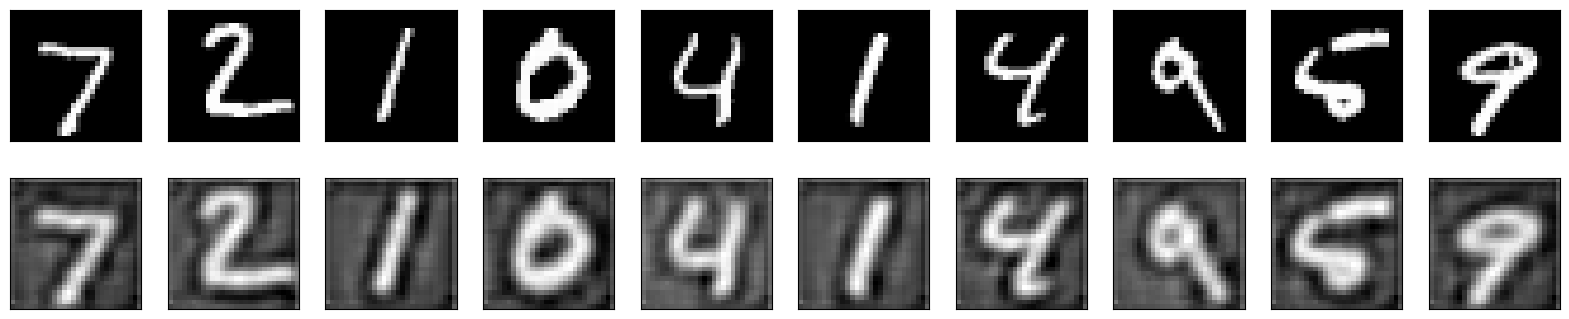

In [13]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Висновок: Розробивши дві нейроні мережі, на мою думку згорткова краще показує результат завдяки засвітленю та не має зайвих фрагментів на картинках. Але багатошарова мережа має перевегу у повному збережені оригіналу, але має невеликі фрагменти з числами 9 та 5.